The calculated spectra include only the ground state of the initial Hamiltonian, and in the case of Quanty are scaled by -$\pi$.

Expectation values for the initial Hamiltonian:


 | $\langle H \rangle$ | $\langle S_z \rangle$ | $\langle L_z \rangle$ | $N_{3d}$ | 
--- | --- | --- | --- | -- |
Quanty | -3.983303 | -0.9466 | -0.1685 | 8.1022 |
TTMult | -3.98331 | | | |


Expectation values for the final Hamiltonian:


| $\langle H \rangle$ | $\langle S_z \rangle$ | $\langle L_z \rangle$ |
--- | --- | --- | --- |
Quanty | -8.024165 | -0.0047 | -0.0102 |
TTMult | -8.02416 | |

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_ttmult_spectrum(fn):
    with open(fn) as fp:
        x = list()
        y = list()
        for line in fp:
            if 'Sticks' in line:
                break
            tokens = line.split()
            if tokens:
                x.append(float(tokens[0]))
                y.append(float(tokens[1]))

        next(fp)

        xsticks = list()
        ysticks = list()
        for line in fp:
            tokens = line.split()
            xsticks.append(float(tokens[0]))
            ysticks.append(float(tokens[1]))

    x = np.array(x)
    y = np.array(y)
    xsticks = np.array(xsticks)
    ysticks = np.array(ysticks)
    
    return x, y, xsticks, ysticks

def read_quanty_spectrum(fn, column=2):
    data = np.loadtxt(fn, skiprows=5)
    x = data[:, 0]
    y = data[:, column]
    return x, y

In Quanty, the right and left polarization dipole operators are defined as: $T_r = \frac{1}{\sqrt{2}} (T_x - i T_y)$ and $T_l = \frac{1}{\sqrt{2}} (T_x + i T_y)$. Using these definitions the two spectra are similar to the spectra calculated using TTMult.

<IPython.core.display.Javascript object>


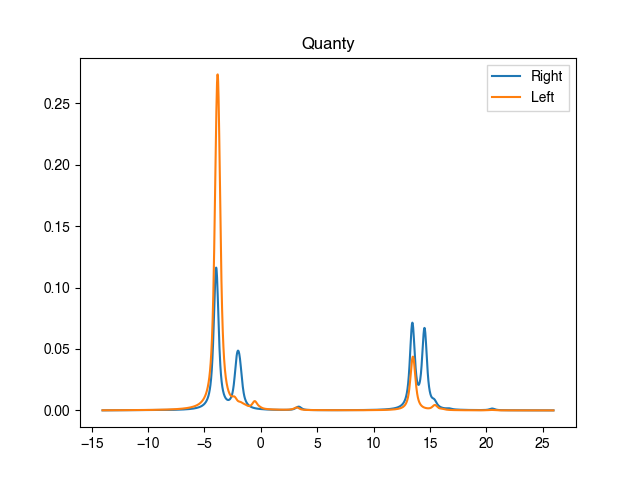

In [3]:
fig, ax = plt.subplots(1, 1)

x, yr = read_quanty_spectrum('Quanty/input.spec', column=4)
_, yl = read_quanty_spectrum('Quanty/input.spec', column=6)
ax.plot(x, yr, label='Right')
ax.plot(x, yl, label='Left')
ax.set_title('Quanty')
ax.legend()

<IPython.core.display.Javascript object>


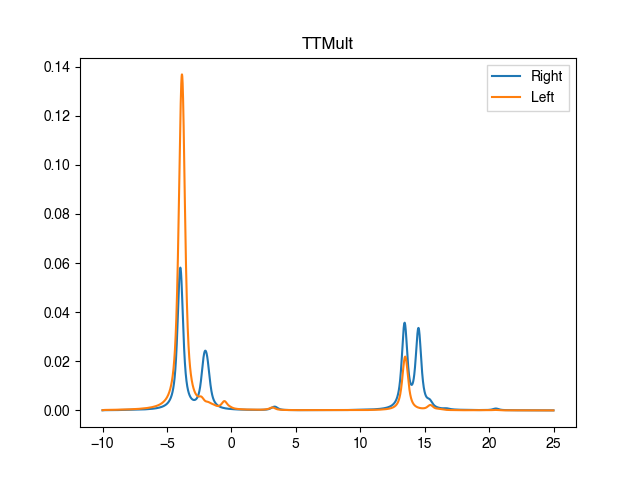

In [4]:
fig, ax = plt.subplots(1, 1)
x, y, _, _ = read_ttmult_spectrum('TTMult/input_right.xy')
ax.plot(x, y, label='Right')
x, y, _, _ = read_ttmult_spectrum('TTMult/input_left.xy')
ax.plot(x, y, label='Left')
ax.set_title('TTMult')
ax.legend()

<IPython.core.display.Javascript object>


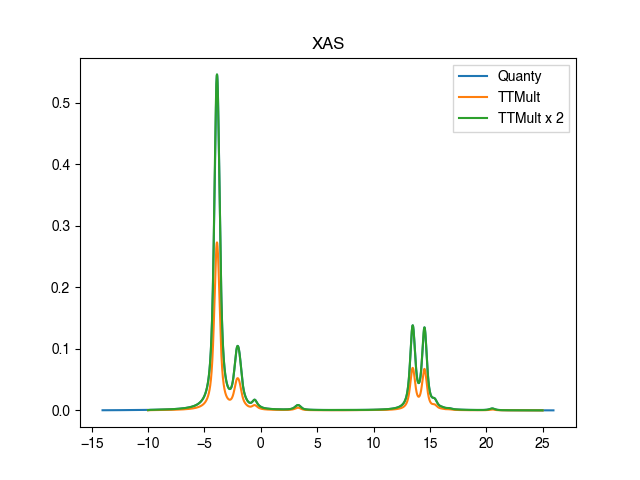

In [5]:
fig, ax = plt.subplots(1, 1)

x, yz = read_quanty_spectrum('Quanty/input.spec', column=2)
_, yr = read_quanty_spectrum('Quanty/input.spec', column=4)
_, yl = read_quanty_spectrum('Quanty/input.spec', column=6)

yxas = yr + yl + yz
ax.plot(x, yxas, label='Quanty')

x, y, _, _ = read_ttmult_spectrum('TTMult/input_iso.xy')
ax.plot(x, y, label='TTMult')
ax.plot(x, y * 2, label='TTMult x 2')

ax.legend()
title = ax.set_title('XAS')

<IPython.core.display.Javascript object>


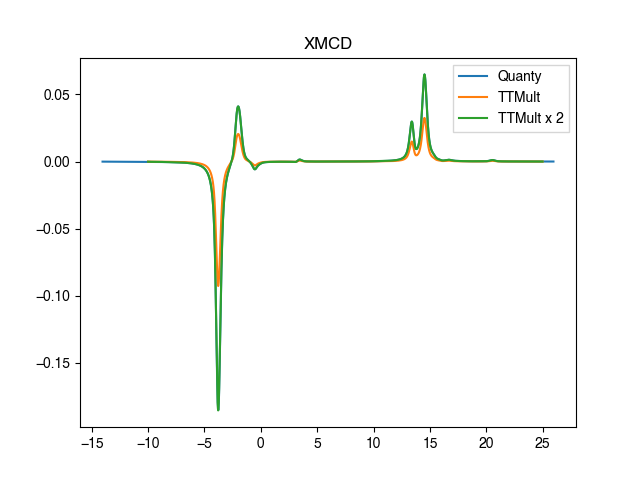

In [6]:
fig, ax = plt.subplots(1, 1)

x, yr = read_quanty_spectrum('Quanty/input.spec', column=4)
_, yl = read_quanty_spectrum('Quanty/input.spec', column=6)
yxmcd = yr - yl # y-1 - y+1
ax.plot(x, yxmcd, label='Quanty')

x, y, _, _ = read_ttmult_spectrum('TTMult/input_xmcd.xy')
ax.plot(x, y, label='TTMult')
ax.plot(x, y * 2, label='TTMult x 2')

ax.legend()
title = ax.set_title('XMCD')

While the XMCD spectrum is taken to be R - L, the sum rule is defined using L - R, hence the minus sign in from of ``yxmcd`` below. See [Arrio et. al](https://dx.doi.org/10.1021/jp952694h) for more details.

In [7]:
l = 2
n = 10 - 8.1022

x, _ = read_quanty_spectrum('Quanty/input.spec', column=4)

Lz_sum_rules = -np.trapz(-yxmcd, x) / np.trapz(yxas, x) * l * n
Lz_calculation = -0.1685

print('Lz (calculation) = {:f}'.format(Lz_calculation))
print('Lz (sum rules)   = {:f}'.format(Lz_sum_rules))

Lz (calculation) = -0.168500
Lz (sum rules)   = -0.168108


<IPython.core.display.Javascript object>


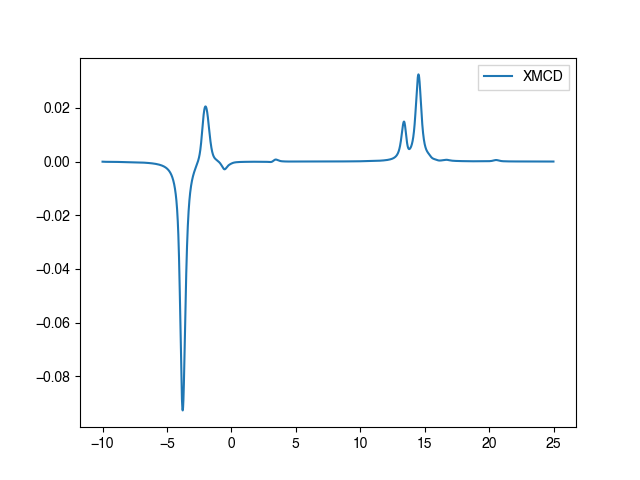

In [8]:
fig, ax = plt.subplots(1, 1)
x, yr, _, _ = read_ttmult_spectrum('TTMult/input_right.xy')
x, yl, _, _ = read_ttmult_spectrum('TTMult/input_left.xy')
ax.plot(x, yr - yl, label='XMCD')
ax.legend()